In [1]:
import torch as pt
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import torchvision

In [2]:

!pip install -q torchinfo
from torchinfo import summary

In [3]:
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image

In [4]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# DATA PREPROCESSING

In [5]:
train_path = '/content/drive/MyDrive/classification_dataset/train' # Path to my train dataset
test_path = '/content/drive/MyDrive/classification_dataset/test'   # Path to my test dataset

In [6]:
data_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

### Testing input images form

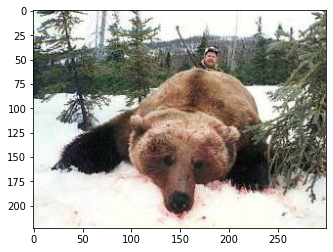

In [ ]:
image = Image.open('/content/drive/MyDrive/classification_dataset/test/bear/009_0081.jpg') #Testing path
plt.imshow(image)

In [ ]:
img = data_transform(image)

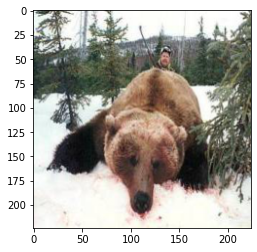

In [ ]:
plt.imshow(img.permute(1,2,0))

### Creating Dataloader

In [ ]:
train_data = datasets.ImageFolder(root = train_path,transform=data_transform,target_transform=None)
test_data = datasets.ImageFolder(root = test_path,transform=data_transform,target_transform=None)

In [ ]:
print(train_data)
print(train_data.classes)
print(test_data[100][1])

Dataset ImageFolder
    Number of datapoints: 532
    Root location: /content/drive/MyDrive/classification_dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
['bear', 'butterfly', 'camel', 'chimp', 'duck', 'elephant']
5


In [ ]:
#plt.imshow(train_data[0][0].permute(1,2,0))

In [ ]:
train_dataloader = DataLoader(dataset = train_data,batch_size=1,shuffle=True)
test_dataloader = DataLoader(dataset = test_data,batch_size=1,shuffle=False)

# Q2_a

## Getting Pre-trained Model 

In [ ]:
# Initialising pre trained model
weights = torchvision.models.ResNet18_Weights.DEFAULT
model = torchvision.models.resnet18(weights=weights)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
# deleting last fc layer
model1 = nn.Sequential(*list(model.children())[:-1]) # Instead you can replace fc with Identity layer here

In [ ]:
model1

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [ ]:
model1.eval() #Bringing to evaluation mode to make it act as feature extractor

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [ ]:
# Testing on a single image
img1 = pt.unsqueeze(img,dim=0) # adding one extra dimension of batch size
img1 = model1(img1).squeeze()
type(img1)
img1.size()
#temp=img1.detach().numpy()

torch.Size([512])

## Extracting Features

Extracting features from train dataset and making a numpy array of train dataset

In [ ]:
flag=0;
for imgs,labels in train_dataloader:
  temp = model1(imgs).squeeze()
  temp =temp.detach().numpy()
  tmp2= labels.detach().numpy()
  if flag==0:
    x_train = temp
    y_train = tmp2
    flag=1
  else:
    x_train = np.row_stack((x_train,temp))
    y_train = np.row_stack((y_train,tmp2))



Extracting features from test dataset and making a numpy array of test dataset

In [ ]:
flag=0
for imgs,labels in test_dataloader:
  temp = model1(imgs).squeeze()
  temp =temp.detach().numpy()
  tmp2= labels.detach().numpy()
  if flag==0:
    x_test = temp
    y_test = tmp2
    flag=1
  else:
    x_test = np.row_stack((x_test,temp))
    y_test = np.row_stack((y_test,tmp2))

In [ ]:
x_train.shape

(532, 512)

In [ ]:
y_test.shape

(120, 1)

In [ ]:
y_train=y_train.reshape(-1)

## Training KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9166666666666666


# Q2_b

reinitialising my dataloader with different batch size

In [ ]:
train_dataloader = DataLoader(dataset = train_data,batch_size=64,shuffle=True)
test_dataloader = DataLoader(dataset = test_data,batch_size=1,shuffle=False)

## Model initialisation

In [ ]:
weights = torchvision.models.ResNet18_Weights.DEFAULT
model = torchvision.models.resnet18(weights=weights)

In [ ]:
model #Pre trained model 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
summary(model,col_names=["num_params", "trainable"])

Layer (type:depth-idx)                   Param #                   Trainable
ResNet                                   --                        True
├─Conv2d: 1-1                            9,408                     True
├─BatchNorm2d: 1-2                       128                       True
├─ReLU: 1-3                              --                        --
├─MaxPool2d: 1-4                         --                        --
├─Sequential: 1-5                        --                        True
│    └─BasicBlock: 2-1                   --                        True
│    │    └─Conv2d: 3-1                  36,864                    True
│    │    └─BatchNorm2d: 3-2             128                       True
│    │    └─ReLU: 3-3                    --                        --
│    │    └─Conv2d: 3-4                  36,864                    True
│    │    └─BatchNorm2d: 3-5             128                       True
│    └─BasicBlock: 2-2                   --                      

In [ ]:
# Freezing weights of layers
for param in model.parameters():
     param.requires_grad=False

In [ ]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [ ]:
# Changing last fc layer
model.fc=nn.Linear(512,6)

In [ ]:
model.fc

Linear(in_features=512, out_features=6, bias=True)

In [ ]:
summary(model,col_names=["num_params", "trainable"])

Layer (type:depth-idx)                   Param #                   Trainable
ResNet                                   --                        Partial
├─Conv2d: 1-1                            (9,408)                   False
├─BatchNorm2d: 1-2                       (128)                     False
├─ReLU: 1-3                              --                        --
├─MaxPool2d: 1-4                         --                        --
├─Sequential: 1-5                        --                        False
│    └─BasicBlock: 2-1                   --                        False
│    │    └─Conv2d: 3-1                  (36,864)                  False
│    │    └─BatchNorm2d: 3-2             (128)                     False
│    │    └─ReLU: 3-3                    --                        --
│    │    └─Conv2d: 3-4                  (36,864)                  False
│    │    └─BatchNorm2d: 3-5             (128)                     False
│    └─BasicBlock: 2-2                   --           

## Training and Testing on Images

In [ ]:
loss_fun = nn.CrossEntropyLoss()
optimizer = pt.optim.Adam(model.parameters(), lr=0.001)

Training my model for 20 epochs

In [ ]:
for epoch in range(0,20):
  running_loss=0.0
  for images,labels in train_dataloader:
    out = model(images)
    loss = loss_fun(out,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    running_loss = running_loss + loss.item();
  print('epoch %d loss %.3f'%(epoch,running_loss/(epoch+1)))


epoch 0 loss 14.903
epoch 1 loss 4.711
epoch 2 loss 2.085
epoch 3 loss 1.101
epoch 4 loss 0.688
epoch 5 loss 0.483
epoch 6 loss 0.349
epoch 7 loss 0.279
epoch 8 loss 0.217
epoch 9 loss 0.176
epoch 10 loss 0.156
epoch 11 loss 0.125
epoch 12 loss 0.105
epoch 13 loss 0.095
epoch 14 loss 0.083
epoch 15 loss 0.067
epoch 16 loss 0.063
epoch 17 loss 0.057
epoch 18 loss 0.057
epoch 19 loss 0.049


In [ ]:
# Bringing it to evaluation mode
model.eval()
# Testing on a single image
for images,labels in test_dataloader:
  print(type(model(images)))
  break;

<class 'torch.Tensor'>


In [ ]:
# Testing on test dataset
count=0
total=0
for imgs,labels in test_dataloader:
  output = model(imgs)
  ans = pt.argmax(output)
  #print(out,labels,ans)
  if ans == labels :
    count = count+1
  total=total+1

In [ ]:
print('The percentage accuracy is')
print(count/total *100)

The percentage accuracy is
95.0


# Q2_c

In [ ]:
train_dataloader = DataLoader(dataset = train_data,batch_size=64,shuffle=True)
test_dataloader = DataLoader(dataset = test_data,batch_size=1,shuffle=False)

In [ ]:
class simple_model(nn.Module):
  def __init__(self):
    super(simple_model,self).__init__()
    self.layer1 = nn.Flatten()
    self.layer2 = nn.Linear(150528,6)
  def forward(self,x):
    x=self.layer1(x)
    x=self.layer2(x)
    return(x)


In [ ]:
model3 = simple_model()

In [ ]:
loss_fun = nn.CrossEntropyLoss()
optimizer = pt.optim.Adam(model3.parameters(), lr=0.001)

Training my simple network

In [ ]:
for epoch in range(0,20):
  running_loss=0.0
  for images,labels in train_dataloader:
    #print(images.shape)
    out = model3(images)
    loss = loss_fun(out,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    running_loss = running_loss + loss.item();
  print('epoch %d loss %.3f'%(epoch,running_loss/(epoch+1)))

epoch 0 loss 462.625
epoch 1 loss 154.181
epoch 2 loss 72.376
epoch 3 loss 43.484
epoch 4 loss 22.141
epoch 5 loss 13.067
epoch 6 loss 6.856
epoch 7 loss 6.536
epoch 8 loss 7.613
epoch 9 loss 6.072
epoch 10 loss 4.256
epoch 11 loss 2.541
epoch 12 loss 1.955
epoch 13 loss 1.087
epoch 14 loss 1.591
epoch 15 loss 0.830
epoch 16 loss 1.038
epoch 17 loss 0.697
epoch 18 loss 1.065
epoch 19 loss 1.123


In [ ]:
#model in evaluation mode
model3.eval()

simple_model(
  (layer1): Flatten(start_dim=1, end_dim=-1)
  (layer2): Linear(in_features=150528, out_features=6, bias=True)
)

In [ ]:
# Testing on test dataset
count=0
total=0
for imgs,labels in test_dataloader:
  output = model3(imgs)
  ans = pt.argmax(output)
  #print(out,labels,ans)
  if ans == labels :
    count = count+1
  total=total+1

In [ ]:
print('The percentage accuracy is')
print(count/total *100)


The percentage accuracy is
24.166666666666668


In [ ]:
# Calculating accuracy of training dataset
train_evaluator = DataLoader(dataset = train_data,batch_size=1,shuffle=True)
count=0
total=0
for imgs,labels in train_evaluator:
  output = model3(imgs)
  ans = pt.argmax(output)
  #print(out,labels,ans)
  if ans == labels :
    count = count+1
  total=total+1
print('The percentage accuracy is')
print(count/total *100)

The percentage accuracy is
70.11278195488721
